Видео лабораторной: https://youtu.be/mb5IkzSRQQQ

TG: https://t.me/data_science_news

In [ ]:
%pip install scipy==1.7.3

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import norm
from scipy.stats import t

from scipy.stats import ttest_ind

plt.rcParams['figure.figsize'] = [12, 8]

## Учебная задача

Фармацевтическая компания разрабатывает новый препарат для лечения редкой болезни. Показателем эффективности препарата является наличие специфичных антител в крови (количество антител на 1 мл крови). Для тестирования эффективности были отобраны 10 пациентов, которые были случайно разделены на две группы (контрольная и группа принимающая лекарство). Предположим что исходные данные нормально распределены.

Для решения задачи нужно выполнить тест:

$$H_0:\ \mu_c=\mu_A\ \mathrm{vs.}\ H_A: \mu_A>\mu_c$$

## Тест на основе нормального распределения с известной общей дисперсией



In [ ]:
# симуляция данных
N=5

mu_c = 5
sigma_c = 2
rv_c = norm(mu_c,sigma_c)
sample_c = rv_c.rvs(N)
print('sample under null hypotesis is {}'.format(sample_c))

mu_A = 9
sigma_A = 2
rv_A = norm(mu_A,sigma_A)
sample_A = rv_A.rvs(N)
print('sample under Alt hypotesis is {}'.format(sample_A))

sample under null hypotesis is [4.35373976 2.65359426 6.10029461 7.98774037 4.56361208]
sample under Alt hypotesis is [ 9.1199429   6.79238182  9.43812985  8.68765198 10.6862917 ]


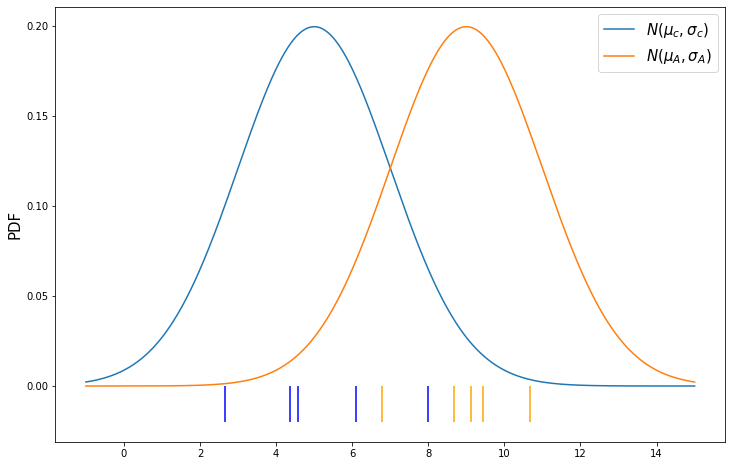

In [ ]:
# выборка
x = np.linspace(-1,15,1000)
plt.plot(x,norm.pdf(x, mu_c, sigma_c), label=r"$N(\mu_c,\sigma_c$)")
plt.plot(x,norm.pdf(x, mu_A, sigma_A), label=r"$N(\mu_A,\sigma_A$)")
plt.vlines(sample_c,-0.02,+0.0, 'blue')
plt.vlines(sample_A,-0.02,+0.0, 'orange')
plt.ylabel('PDF', fontsize = 15)
plt.legend(fontsize=15)

### Сумма независимых нормальных случайных величин

Сумма двух независимых нормальных СВ $X \sim N(\mu_x,\sigma^2_x)$, $Y \sim N(\mu_y,\sigma^2_y)$ это _нормальная_ случайная величина, такая что:

$$Z=X+Y,\ Z \sim N(\mu_x+\mu_y,\sigma^2_x+\sigma^2_y)$$

### Неасимптотическое выборочное среднее

Пусть $X_1,..,X_n \sim^{iid} N(\mu,\sigma^2)$, тогда выборочное средние точно (неасимтотически) сходится к нормальному распределению:

$$\bar{X}_N=\frac{1}{n}\Sigma X_i \sim N(\mu,\frac{\sigma^2}{N})$$


### Выборочные средние для котрольной и тестовой группы

$$\bar{X}_N^C \sim N(\mu_c,\frac{\sigma_c^2}{N})$$

$$\bar{X}_N^A \sim N(\mu_A,\frac{\sigma_A^2}{N})$$

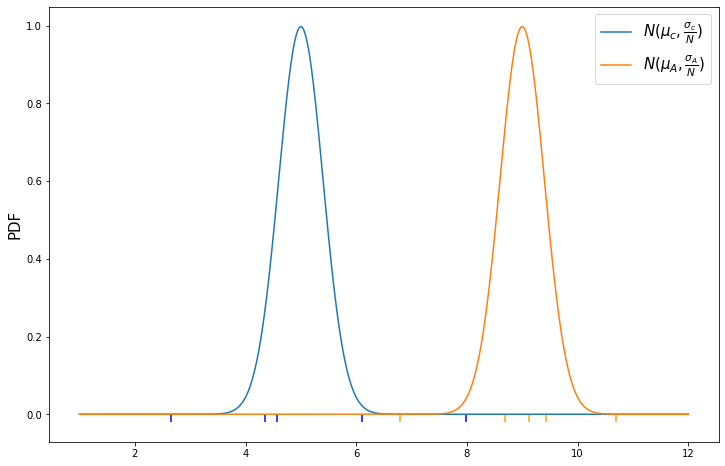

In [ ]:
# выборочное среднее
x = np.linspace(1,12,1000)
plt.plot(x,norm.pdf(x, mu_c, sigma_c/N), label=r"$N(\mu_c,\frac{\sigma_c}{N}$)")
plt.plot(x,norm.pdf(x, mu_A, sigma_A/N), label=r"$N(\mu_A,\frac{\sigma_A}{N}$)")
plt.vlines(sample_c,-0.02,+0.0, 'blue')
plt.vlines(sample_A,-0.02,+0.0, 'orange')
plt.ylabel('PDF', fontsize = 15)
plt.legend(fontsize=15)

### Статистический критерий (test statistics)

Зафиксируем уровень статистической значимости $\alpha=0.05$. То есть вероятность того, что мы отклоним нулевую гипотезу, при том что она истинна равна 5% или $P(\mathrm{reject\ H_0}|\mathrm{H_0\ true})=0.05$.

В условиях нулевой гипотезы мы имеем:

$$\frac{\bar{X}_{N_A}-\bar{X}_{N_C}-(\mu_A-\mu_c)}{\sqrt{\frac{\sigma_c^2}{N}+\frac{\sigma_a^2}{N}}} =\sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\sigma_c^2 + \sigma_a^2}} \sim N(0,1)$$

Следовательно, статистический критерий:

$$\psi_\alpha=\mathbb{1}\left[\sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\sigma_c^2 + \sigma_a^2}} > q_{5\%}=1.65 \right] $$

Это односторонний тест с двумя выборками.

In [ ]:
# 5% квантиль стандартного нормального распределения
q_5 = norm.ppf(0.95)
print(q_5)

# значение тест статистики
test_val = np.sqrt(N)*(sample_A.mean()-sample_c.mean())*1/(sigma_c^2+sigma_A^2)
print(test_val)

# статистический критерий
print(test_val > q_5)

# p-value
print('p-value = {}'.format(1-norm.cdf(test_val)))

1.6448536269514722
2.1315784401012645
True
p-value = 0.0165207588536449


## Тест на основе нормального распределения с **неизвестной** общей дисперсией



### Асимптотический вариант

В случае, если дисперсия неизвестна, но **выполняются** условия центральной предельной теоремы, мы имеем:

$$\sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\sigma_c^2 + \sigma_a^2}} \sim N(0,1)$$

Выборочная дисперсия $\hat{\sigma}^2=\frac{1}{n-1} \Sigma_{i=1}^N (X_i-\bar{X}_N)^2$ сходится к истинной дисперсии по закону больших чисел. Согласно [теореме Слуцкого](https://en.wikipedia.org/wiki/Slutsky%27s_theorem):

$$\sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\hat{\sigma}_c^2 + \hat{\sigma}_a^2}} \to^d \sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\sigma_c^2 + \sigma_a^2}} \sim N(0,1)$$

Тогда статистический критерий будет выражен:

$$\psi_\alpha=\mathbb{1}\left[\sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\hat{\sigma}_c^2 + \hat{\sigma}_a^2}} > q_{\alpha} \right]$$

где $q_{\alpha}$ это квантиль порядка $1-\alpha$ для стандартного нормального распределения.

### Точный вариант

#### Распределение хи-квадрат (chi-squared)

Пусть для некоторого $d>0$ существует сумма квадратов независимых и одинаково распределённых стандартных нормальных случайных величин:

$$\chi^2 = Z_1^2 + ... Z_d^2,\ Z_1,...,Z_d \sim N(0,1)$$

тогда $\chi^2$ это распределение [xи-квадрат](https://en.wikipedia.org/wiki/Chi-squared_distribution) с $d$ степенями свободы.

#### Выборочная дисперсия

$\hat{\sigma}_n^2=\frac{1}{n} \Sigma_{i=1}^N (X_i-\bar{X}_N)^2$

Согласно [теореме Кокрана](https://en.wikipedia.org/wiki/Cochran%27s_theorem):
- если $X_1,...,X_N \sim N(\mu,\sigma)$
- если $\bar{X}_N$ независим от выборочной дисперсии $\hat{\sigma}^2$

то $$\frac{n\hat{\sigma}^2}{\sigma^2} \sim \chi_{n-1}^2$$.


#### Распределение t (распределение Стьюдента)

Для любого положительного $d$, распределение Стьюдента с $d$ степенями свободы это случайная величина $t_d=\frac{Z}{\sqrt{\frac{V}{d}}}$. Где $Z\sim N(0,1)$, $V \sim \chi^2_d$ и $Z$ независимо от $V$.

#### Тест статистика на основе распределения t

Предположим, что $H_0:\ \mu=0\ \mathrm{vs.} H_1:\ \mu \neq 0$. Тогда тест статистика с оценкой дисперсии будет иметь вид:

$$T_n=\frac{\bar{X}_n}{\sqrt{\frac{\hat{\sigma}_n}{n}}}=\frac{\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma}}{\sqrt{\frac{\hat{\sigma}_n}{\sigma^2}}}$$

Так как, числитель $\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma} \sim N(0,1)$, а знаменатель по теореме Кокрана $\sqrt{\frac{\hat{\sigma}_n}{\sigma^2}} \sim \frac{\chi^2_{n-1}}{n-1}$,

следовательно:

$$T_n \sim t_{n-1}$$


#### Для нашего примера

$$ \sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\hat{\sigma}_c^2 + \hat{\sigma}_a^2}} \sim t_{n}$$

Следовательно, **статистический критерий**

$$\psi_\alpha=\mathbb{1}\left[\sqrt{N} \frac{\bar{X}_{N_A}-\bar{X}_{N_c}}{\sqrt{\hat{\sigma}_c^2 + \hat{\sigma}_a^2}} > q_{\alpha} \right]$$

где $q_a$ это квантиль порядка $1-\alpha$ **распределения $t_{n}$**


In [ ]:
# 5% квантиль t-распределения c 5 степенями
df = 5
q_5 = t.ppf(0.95,df)
print(q_5)

# значение тест статистики
test_val = np.sqrt(N)*(sample_A.mean()-sample_c.mean())*1/np.sqrt(sample_A.var(ddof=1) + sample_c.var(ddof=1))
print(test_val)

# статистический критерий
print(test_val > q_5)

# p-value
print('p-value = {}'.format(1-t.cdf(test_val,df)))

2.015048372669157
3.46859240261804
True
p-value = 0.008938188122282198


In [ ]:
ttest_ind(sample_A, sample_c, equal_var=True, alternative='greater')

Ttest_indResult(statistic=3.46859240261804, pvalue=0.004230113085685781)

## Тест на основе нормального распределения с **неизвестной** разной дисперсией и разным размером выборок

$$ \frac{\bar{X}_{M_A}-\bar{X}_{N_c}}{\sqrt{\frac{\hat{\sigma}_c^2}{n} + \frac{\hat{\sigma}_a^2}{m}}} \sim t_{n}$$

где $m$ и $n$ это различные размеры выборок для котнтрольной и тестовой группы.

Тогда размер степеней свободы может быть определён по [формуле Уэлча–Саттертуэйта](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation):

$$N=\frac{(\frac{\hat{\sigma}^2_A}{n}+\frac{\hat{\sigma}^2_c}{m})^2}{\frac{\hat{\sigma}^4_A}{n^2(n-1)}+\frac{\hat{\sigma}^4_c}{m^2(m-1)}}$$

**Cтатистический критерий**

$$\psi_\alpha=\mathbb{1}\left[\frac{\bar{X}_{M_A}-\bar{X}_{N_c}}{\sqrt{\frac{\hat{\sigma}_c^2}{n} + \frac{\hat{\sigma}_a^2}{m}}} > q_{\alpha} \right]$$

где $q_a$ это квантиль порядка $1-\alpha$ **распределения $t_{n}$**

In [ ]:
# переменные
mu_c_hat = sample_c.mean()
mu_a_hat = sample_A.mean()
var_c_var = sample_c.var(ddof=1)
var_a_var = sample_A.var(ddof=1)
nn=mm=5

# N по формуле Уэлча
df = (var_a_var/nn+var_c_var/mm)**2/(var_a_var**2/(nn**2*(nn-1))+var_c_var**2/(mm**2*(mm-1)))
print(df)

# 5% квантиль t-распределения c N степенями свободы
q_5 = t.ppf(0.95,df)
print(q_5)

# значение тест статистики
test_val = (sample_A.mean()-sample_c.mean())*1/np.sqrt(sample_A.var(ddof=1)/nn + sample_c.var(ddof=1)/mm)
print(test_val)

# статистический критерий
print(test_val > q_5)

# p-value
print('p-value = {}'.format(1-t.cdf(test_val,df)))

7.181778059343462
1.8873888201942273
3.46859240261804
True
p-value = 0.005006339938451787


In [ ]:
ttest_ind(sample_A, sample_c, equal_var=False, alternative='greater')

Ttest_indResult(statistic=3.46859240261804, pvalue=0.005006339938451772)

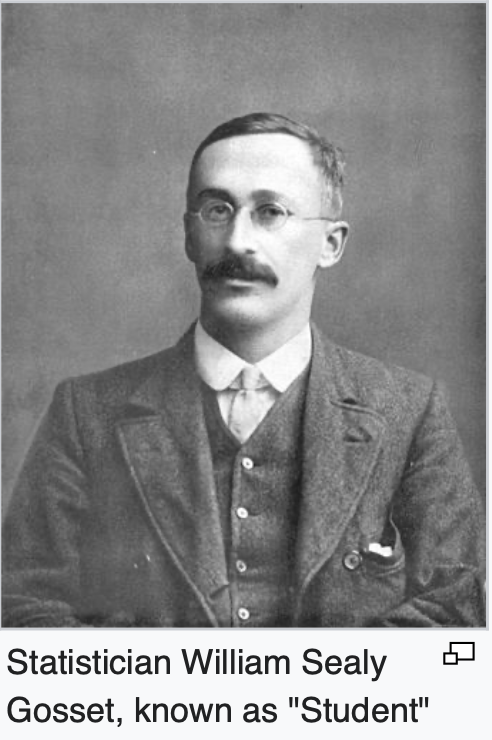

Source: https://en.wikipedia.org/wiki/Student%27s_t-distribution

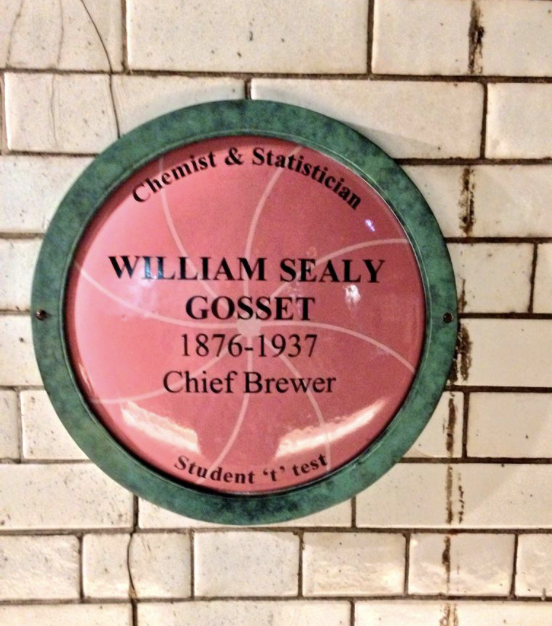

Source: https://twitter.com/seerymk/status/610496043680169984